<a href="https://colab.research.google.com/github/MNDL-27/aiml-intern/blob/main/AI_%26_ML_INTERNSHIP_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
file_path = '/content/Titanic-Dataset.xls'
df = pd.read_csv(file_path)

In [ ]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


The 'Age' column is skewed, using the median is a more robust approach.

In [ ]:
mean_age = df['Age'].mean()
print(f"Mean Age: {mean_age}")

df['Age'].fillna(mean_age, inplace=True)
print(df['Age'].isnull().sum())

Mean Age: 29.69911764705882
0


/tmp/ipython-input-2350114370.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(mean_age, inplace=True)


The 'Embarked' column in the dataset is categorical and might have missing values.

In [ ]:
embarked_mode = df['Embarked'].mode()[0]
print(f"Most Common Embarkation Port: {embarked_mode}")


df['Embarked'].fillna(embarked_mode, inplace=True)
print(df['Embarked'].isnull().sum())

Most Common Embarkation Port: S
0


Label Encoding to the 'Sex' column of the dataset.

In [ ]:
df_encoded = df.copy()
df_encoded['Sex_Encoded'] = df_encoded['Sex'].astype('category').cat.codes
print(df_encoded[['Sex', 'Sex_Encoded']].head())

      Sex  Sex_Encoded
0    male            1
1  female            0
2  female            0
3  female            0
4    male            1


Applying StandardScaler to the 'Age' and 'Fare' columns of the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['Age', 'Fare']
df_processed = df_encoded.copy()

df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])
print(df_processed[numerical_features].head())

print(f"\nNew Mean of Age: {df_processed['Age'].mean():.4f}")
print(f"New Standard Deviation of Age: {df_processed['Age'].std():.4f}")

        Age      Fare
0 -0.592481 -0.502445
1  0.638789  0.786845
2 -0.284663 -0.488854
3  0.407926  0.420730
4  0.407926 -0.486337

New Mean of Age: 0.0000
New Standard Deviation of Age: 1.0006


Using Scikit-learn

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

df_normalized = df_encoded.copy()
df_normalized[numerical_features] = min_max_scaler.fit_transform(df_normalized[numerical_features])

print(df_normalized[numerical_features].head())
print(f"\nNew Min of Age: {df_normalized['Age'].min():.4f}")
print(f"New Max of Age: {df_normalized['Age'].max():.4f}")

        Age      Fare
0  0.271174  0.014151
1  0.472229  0.139136
2  0.321438  0.015469
3  0.434531  0.103644
4  0.434531  0.015713

New Min of Age: 0.0000
New Max of Age: 1.0000


Visualising the 'Fare' and 'Age' columns from the Titanic dataset to check for outliers.

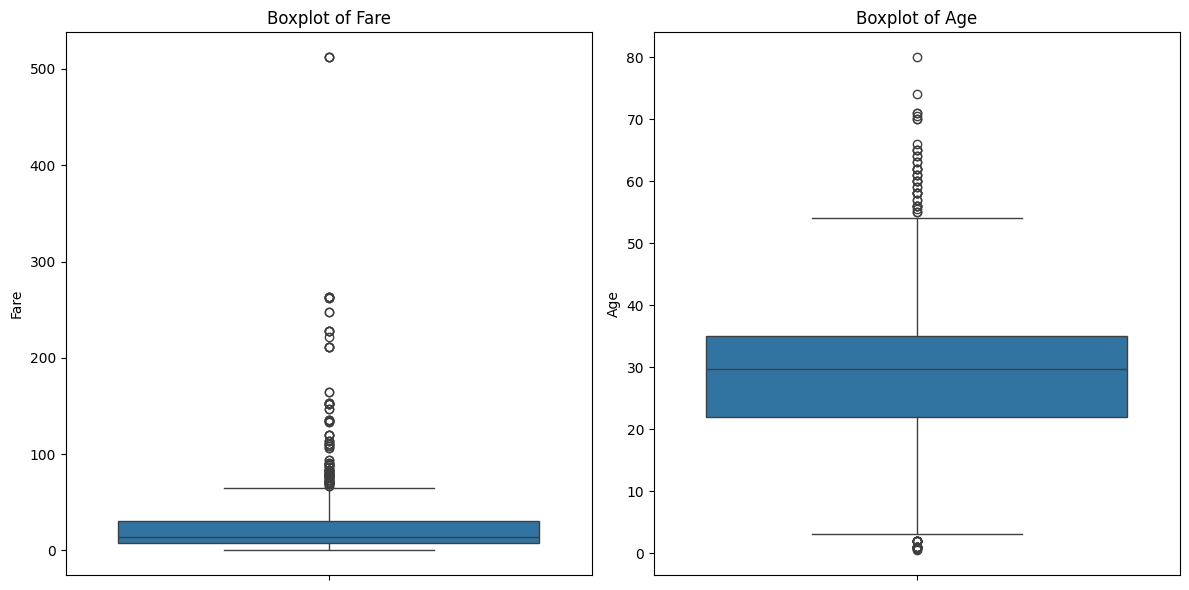

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df_cleaned = df_encoded.copy()
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=df_cleaned['Fare'])
plt.title('Boxplot of Fare')
plt.ylabel('Fare')
plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.tight_layout()
plt.savefig('outlier_boxplots.png')

Remove the outliers from the 'Fare' column.

In [ ]:
Q1 = df_cleaned['Fare'].quantile(0.25)
Q3 = df_cleaned['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Original DataFrame shape: {df_cleaned.shape}")
print(f"Fare outliers will be values below {lower_bound:.2f} and above {upper_bound:.2f}")

df_no_outliers = df_cleaned[(df_cleaned['Fare'] >= lower_bound) & (df_cleaned['Fare'] <= upper_bound)]

print(f"New DataFrame shape after removing outliers: {df_no_outliers.shape}")

Original DataFrame shape: (891, 13)
Fare outliers will be values below -26.72 and above 65.63
New DataFrame shape after removing outliers: (775, 13)
